<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Conceptos Machine Learning </p> Regresión Logística </p> Árboles de Decisión </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning </p></tp>
            <tp><p style="font-size:115%;text-align:center">A. Supervisado</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>




# <FONT SIZE=5 COLOR="purple"> 1. Ejemplo Práctico con Datos: diabetes</FONT>

- En esta sección haremos un ejemplo práctico.

- Iniciaremos indicando las librerías que debemos usar.

## <FONT SIZE=4 COLOR="blue"> 1.1 Librerías de trabajo </FONT>

In [15]:
# Manipulación de data.frames
import pandas       as pd
import numpy        as np

# Librerías para Gráficos
import matplotlib.pyplot  as plt
import seaborn            as sns
import plotly.express     as px

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento/escalar los datos
from sklearn.preprocessing      import StandardScaler, MinMaxScaler

# Para aplicar modelos
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.tree               import DecisionTreeClassifier
from sklearn.ensemble           import RandomForestClassifier

# Para graficar los árbolitos
from sklearn.tree               import export_graphviz
from graphviz                   import Source

# Métricas de evaluación
from sklearn                    import metrics
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV, RandomizedSearchCV

# curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=4 COLOR="blue"> 1.2 Contexto del problema </FONT>

 En este caso intentaremos predecir a qué categoría corresponde un conjunto de datos.

En términos generales, seremos mucho más precisos si tenemos que modelar el comportamiento de una categoría que de una variable continua, por lo que veremos que muchas veces, incluso los problemas de predecir variables numéricas se pueden discretizar y convertir en problemas de clasificación.

En este caso, veremos un caso típico de problema de clasificación. Queremos predecir si una integrante de una muestra que representa a una población, tiene diabetes. Queremos hacer esto a partir de múltiples variables que tenemos de cada una de las pacientes:

- ***Pregnancies***: Número de embarazos que ha tenido en su vida
- ***Glucose***: Nivel de concentración de glucosa en sangre
- ***BloodPressure***: Presión arterial
- ***SkinThikness***: Espesor de piel a la altura del triceps
- ***Insulin***: Respuesta a dosis de insulina en 2 horas
- ***BMI***: Índice de masa corporal
- ***DiabetesPedigreeFunction***: Presencia de diabetes en ascendencia directa
- ***Age***: Edad del paciente
- ***Outcome***: Variable que queremos predecir:
   - $1$ : Tiene diabetes
   - $0$ : No tiene diabetes



## <FONT SIZE=4 COLOR="blue"> 1.3 Importar los datos </FONT>

Vamos a traer los datos del GitHub de la siguiente manera.

Lo primero que haremos es importar los datos que están en el siguiente link o pueden ser descargados de la página de Kaggle.

In [16]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/diabetes.csv"
diabetes= pd.read_csv(url)

In [17]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# cambiar el nombre de Outcome por resultado
diabetes.rename(columns={"Outcome":"resultado"}, inplace=True)

In [19]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <FONT SIZE=4 COLOR="blue">  1.4 Alistamiento para el modelo</FONT>

En este paso vamos a definir

- Variable objetivo

- Variables predictoras

- Conjunto de entrenamiento y de prueba

- Escalr los datos

In [20]:
# las variables predictoras
X = diabetes.drop("resultado", axis=1)
# la variable objetivo
y = diabetes["resultado"]
# Dividir en dos conjuntos: entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.3)          # tamaño del conjunto de prueba

# definimos la función para escalar
escalar = StandardScaler()
# lo aplicamos a los conjuntos
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

## <FONT SIZE=4 COLOR="blue">  1.5 Modelo KNN</FONT>

Vamos a aplicar el modelo KNN.

En esta parte usaremos la librería *sciki-learn* y la función *KNeighborsClassifier*.

Para generar el modelo tenemos múltiples alternativas, ya que podemos seleccionar:

   - **k** : número de vecinos. Por defecto $k=5$
   - La **métrica** : *minkowski* , *manhattan* , *euclidean*, etc.
   - Los pesos **weights**: *uniform* y *distance*. Por defecto *uniform*

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [21]:
# definir el modelo
KNN = KNeighborsClassifier(n_neighbors = 10,         # número de vecinos k=10
                           metric = 'euclidean',     # métrica euclideana
                           weights= "uniform")       # peso que se asigna a los datos
# entrenamos el modelo
KNN.fit(X_train_s,y_train)

# Evaluar el modelo
y_pred_knn = KNN.predict(X_test_s)
metrics=["accuracy", "recall" , "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_knn),
          recall_score(y_test,y_pred_knn),
          precision_score(y_test,y_pred_knn),
          f1_score(y_test,y_pred_knn)]
pd.DataFrame({"metrics": metrics , "values" : values})

,metrics,values
0,accuracy,0.757576
1,recall,0.445946
2,precision,0.687500
3,f1,0.540984


## <FONT SIZE=4 COLOR="blue">  1.5 Modelo Regresión Logística</FONT>



In [22]:
# definir el modelo
Log_reg = LogisticRegression(random_state=0)
# entrenamos el modelo
Log_reg.fit(X_train_s, y_train)

# Evaluar el modelo
y_pred_log = Log_reg.predict(X_test_s)
metrics=["accuracy", "recall" , "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_log),
          recall_score(y_test,y_pred_log),
          precision_score(y_test,y_pred_log),
          f1_score(y_test,y_pred_log)]
pd.DataFrame({"metrics": metrics , "values" : values})

,metrics,values
0,accuracy,0.779221
1,recall,0.527027
2,precision,0.709091
3,f1,0.604651


## <FONT SIZE=4 COLOR="blue">  1.6 Modelo Árboles de Decisión</FONT>



In [23]:
# Generamos el modelo
Decision_Tree = DecisionTreeClassifier(max_depth = 6,           # Profundidad del árbol
                                       criterion = "gini",      # Función de costo.
                                       random_state = 123)      # Semilla
# entrenamos el modelo
Decision_Tree.fit(X_train_s, y_train)

# Evaluar el modelo
y_pred_tree = Decision_Tree.predict(X_test_s)
metrics=["accuracy", "recall" , "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_tree),
          recall_score(y_test,y_pred_tree),
          precision_score(y_test,y_pred_tree),
          f1_score(y_test,y_pred_tree)]
pd.DataFrame({"metrics": metrics , "values" : values})

,metrics,values
0,accuracy,0.766234
1,recall,0.513514
2,precision,0.678571
3,f1,0.584615


In [ ]:
dot_data = export_graphviz(Decision_Tree,                                 # modelo
                           feature_names = X_train.columns,            # columnas de entrenamiento
                           filled=True)                                # colores del árbol (relleno)
Source(dot_data, format="png")

In [ ]:
# Generamos el modelo
random = RandomForestClassifier()
# entrenamos el modelo
random.fit(X_train_s, y_train)

# Evaluar el modelo
y_pred_random = random.predict(X_test_s)
metrics=["accuracy", "recall" , "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_random),
          recall_score(y_test,y_pred_random),
          precision_score(y_test,y_pred_random),
          f1_score(y_test,y_pred_random)]
pd.DataFrame({"metrics": metrics , "values" : values})

Ahora vamos a calcular al área bajo la curva y las curvas ROC

In [24]:
# para knn
# calculamos el área bajo la curva ROC: AUC
knn_roc_auc = roc_auc_score(y_train, KNN.predict_proba(X_train_s)[:,1])
knn_roc_auc

np.float64(0.863544828829912)

In [25]:
# para regresión logística
# calculamos el área bajo la curva ROC: AUC
log_roc_auc = roc_auc_score(y_train, Log_reg.predict_proba(X_train_s)[:,1])
log_roc_auc

np.float64(0.8378467734663821)

In [26]:
# para árboles de decisión
# calculamos el área bajo la curva ROC: AUC
tree_roc_auc = roc_auc_score(y_train, Decision_Tree.predict_proba(X_train_s)[:,1])
tree_roc_auc

np.float64(0.9364912386162123)

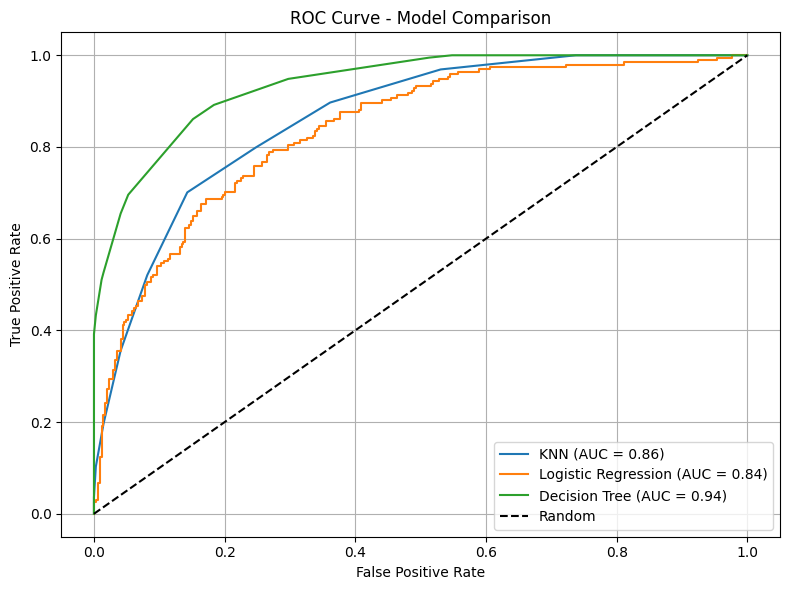

In [27]:
# graficar las curvas ROC
fpr1, tpr1, thresholds1 = roc_curve(y_train, KNN.predict_proba(X_train_s)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_train, Log_reg.predict_proba(X_train_s)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_train, Decision_Tree.predict_proba(X_train_s)[:,1])

auc1 = roc_auc_score(y_train, KNN.predict_proba(X_train_s)[:,1])
auc2 = roc_auc_score(y_train, Log_reg.predict_proba(X_train_s)[:,1])
auc3 = roc_auc_score(y_train, Decision_Tree.predict_proba(X_train_s)[:,1])

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'KNN (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Logistic Regression (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'Decision Tree (AUC = {auc3:.2f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Estética
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()